In [18]:
from collections import defaultdict
import math
import queue
from pprint import pprint
from IPython.core.debugger import set_trace
import warnings
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import torchvision.datasets as datasets
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

from src.classification.models.alexnet import AlexNet
from src.classification.models.vgg import VGGBlock, make_vgg_11_a
from src.classification.predictor import ClassificationPredictor
from src.classification.train import fit
from src.classification.plot import plot_classifications
from src.transform import to_numpy, to_rgb, to_torch, resize
from src.misc import plot_summary, transpose_history

In [22]:
warnings.filterwarnings("ignore")

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

## Model

### Create Model

In [3]:
alexnet = AlexNet(10)

In [10]:
cuda = torch.device("cuda:2")
alexnet = alexnet.to(cuda)

## Dataset 

### Define Transforms

In [6]:
img_transform = Compose([
    to_numpy,
    to_rgb,
    resize, 
    to_torch,
])

### Create Dataset

In [7]:
mnist_testset = datasets.MNIST(
    root='./resources/classification/', 
    train=False, 
    download=True, 
    transform=img_transform,
)
mnist_trainset = datasets.MNIST(
    root='./resources/classification/', 
    train=True, 
    download=True, 
    transform=img_transform,
)

### Create Dataloader

In [8]:
train_dl = DataLoader(mnist_trainset, batch_size=32)
test_dl = DataLoader(mnist_testset, batch_size=32)

## Train

In [12]:
alex_optimizer = torch.optim.SGD(alexnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
fit_history = fit(alexnet, alex_optimizer, train_dl, test_dl, criterion, cuda, 4)

Epoch: 01


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Summary:
{'accuracy': 0.9585, 'loss': 0.13388150616924616}


  0%|          | 0/313 [00:00<?, ?it/s]

Eval Summary:
{'accuracy': 0.9846, 'loss': 0.04423407867524164}
Epoch: 02


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Summary:
{'accuracy': 0.9801833333333333, 'loss': 0.06369858736216166}


  0%|          | 0/313 [00:00<?, ?it/s]

Eval Summary:
{'accuracy': 0.9891, 'loss': 0.02890392498763355}
Epoch: 03


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Summary:
{'accuracy': 0.9853666666666666, 'loss': 0.04828004715406385}


  0%|          | 0/313 [00:00<?, ?it/s]

Eval Summary:
{'accuracy': 0.9892, 'loss': 0.030926061486720616}
Epoch: 04


  0%|          | 0/1875 [00:00<?, ?it/s]

Train Summary:
{'accuracy': 0.9874666666666667, 'loss': 0.039919682463405985}


  0%|          | 0/313 [00:00<?, ?it/s]

Eval Summary:
{'accuracy': 0.992, 'loss': 0.0232600412346858}


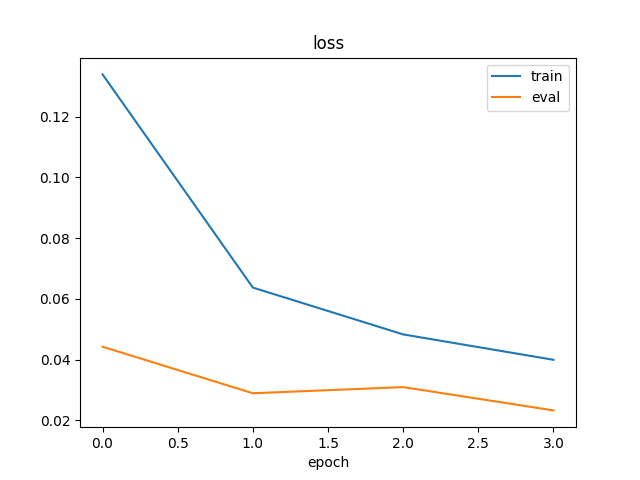

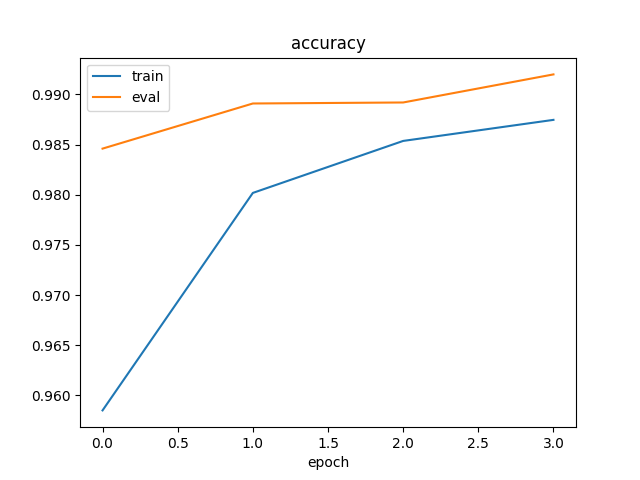

In [13]:
plot_summary(transpose_history(fit_history))

## Prediction

In [14]:
alexnext_predictor = ClassificationPredictor(model=alexnet)

In [15]:
imgs, gt_labels = next(iter(test_dl))

In [16]:
pred_labels = alexnext_predictor(imgs.to(cuda))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

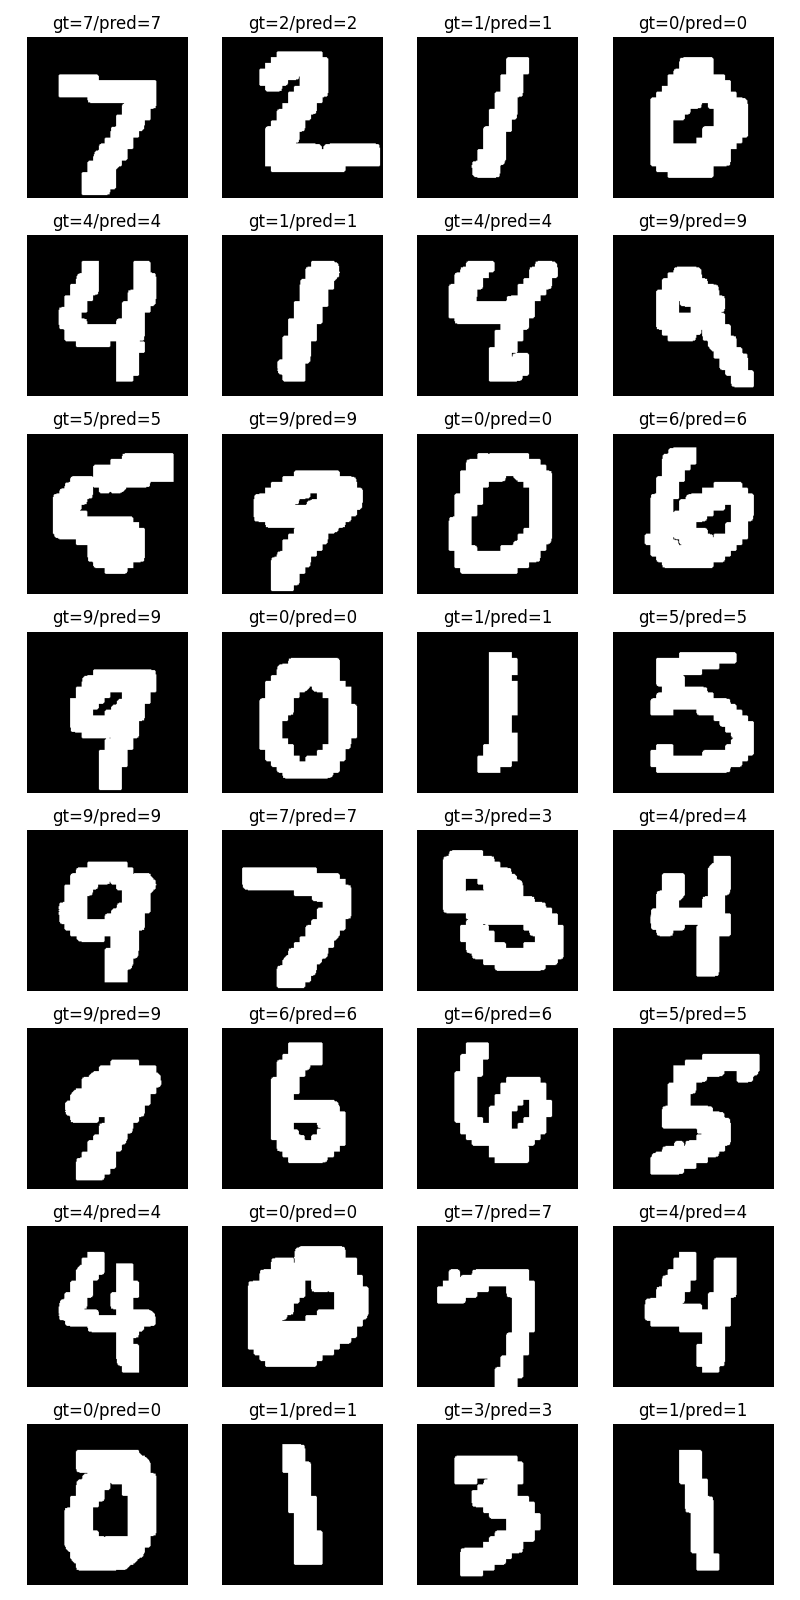

In [23]:
plot_classifications(imgs.permute(0, 2, 3, 1).numpy(), pred_labels, gt_labels)